# **CS575**
# **IBM_stock**
# **Manohar Kumar**




In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime
#import packages
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,7

In [ ]:
#download data
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30)) 
#print first few lines of data
print(ibm.head())
#export and save as csv files
ibm.to_csv('IBM_stock.csv', sep=',')

                  High         Low  ...     Volume   Adj Close
Date                                ...                       
2014-08-01  191.500000  188.860001  ...  5181100.0  143.561371
2014-08-04  189.949997  188.600006  ...  2125900.0  143.933304
2014-08-05  189.199997  186.440002  ...  3307900.0  142.005493
2014-08-06  186.880005  184.440002  ...  3847000.0  141.982544
2014-08-07  186.679993  183.580002  ...  2708600.0  140.707535

[5 rows x 6 columns]


In [ ]:
#normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371
2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304
2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493
2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544
2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535


In [ ]:
ibm.shape

(589, 6)

In [ ]:
new_IBM = ibm.reset_index()
new_IBM.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371
1,2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304
2,2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493
3,2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544
4,2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535


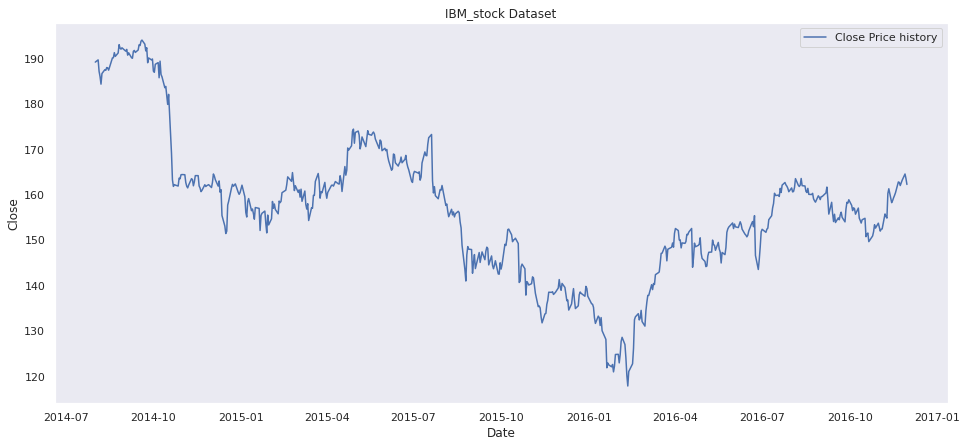

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
plt.plot(ibm["Close"], label='Close Price history')
plt.title('IBM_stock Dataset')
plt.ylabel('Close')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

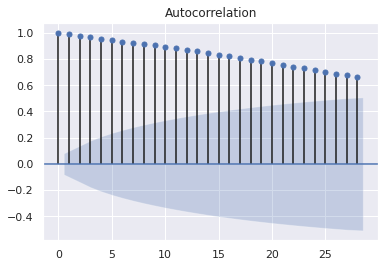

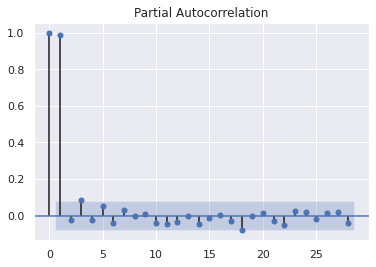

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ibm['Close'])
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ibm['Close'])
plt.show()

# **Test for stationarity**

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = ibm[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            1.268862
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


P value is less than .05 so, it is non stationary

In [ ]:

#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = ibm[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


P value is greater than .05 so, it is non stationary

KPSS AND ADF test gives non stationary so, given dataset is no stationary

Making a Time Series Stationary

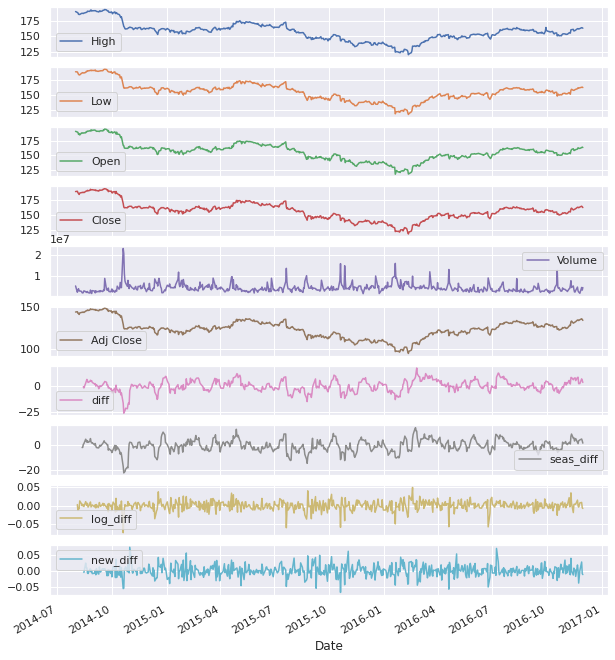

In [ ]:
# Differencing
ibm['diff'] = ibm['Close'].diff(periods=9)

# Seasonal Differencing
ibm['seas_diff'] = ibm['Close'].diff(periods=7)

# Transformation (here we use log transformation)
dataset_log = np.log(ibm['Close'])
ibm['log_diff'] = dataset_log.diff(periods=1)
ibm['new_diff'] = ibm['log_diff'].diff(periods=9)
ibm.plot(subplots=True, figsize=(10,12))
plt.show()

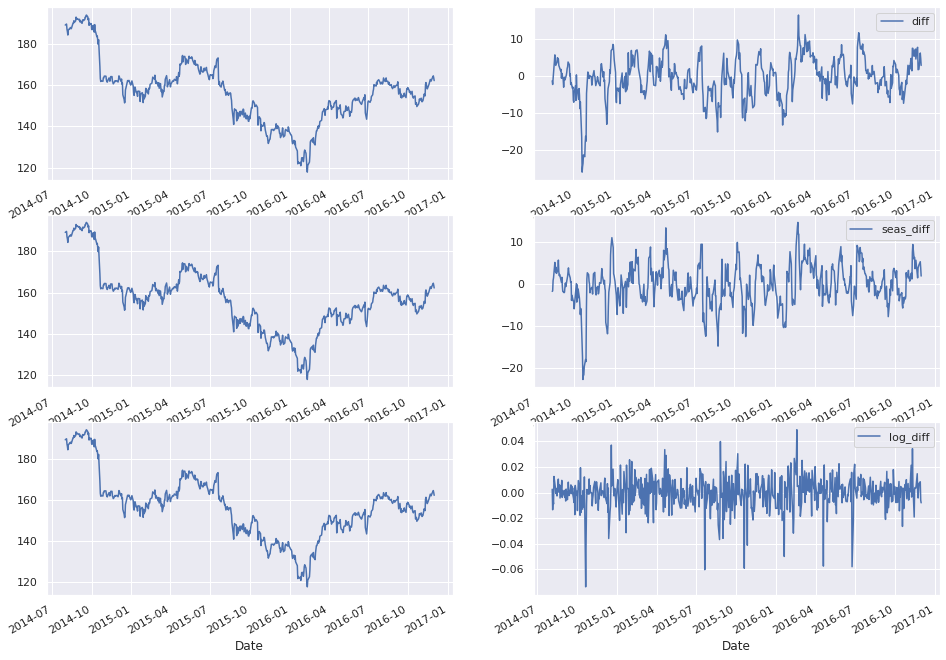

In [ ]:
# visualize
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
ibm['Close'].plot()
plt.subplot(3,2,2)
ibm['diff'].plot()
plt.legend()

plt.subplot(3,2,3)
ibm['Close'].plot()
plt.subplot(3,2,4)
ibm['seas_diff'].plot()
plt.legend()

plt.subplot(3,2,5)
ibm['Close'].plot()
plt.subplot(3,2,6)
ibm['log_diff'].plot()
plt.legend()
plt.show()

Test Results

In [ ]:
adf_test('Close')
print("\n")
kpss_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


Results of KPSS Test for  Close
Test Statistic            1.268862
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
adf_test('diff')
print("\n")
kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                  -3.940122
p-value                          0.001759
#Lags Used                      19.000000
Number of Observations Used    560.000000
Critical Value (1%)             -3.442081
Critical Value (5%)             -2.866715
Critical Value (10%)            -2.569526
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.27842
p-value                   0.10000
Lags Used                19.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
adf_test('seas_diff')
print("\n")
kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  -4.559737
p-value                          0.000153
#Lags Used                      17.000000
Number of Observations Used    564.000000
Critical Value (1%)             -3.441998
Critical Value (5%)             -2.866678
Critical Value (10%)            -2.569506
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.272581
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
adf_test('log_diff')
print("\n")
kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                -1.830987e+01
p-value                        2.277281e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.23043
p-value                   0.10000
Lags Used                19.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


From the above test all three test gives Stationarity so i am considering log_diff

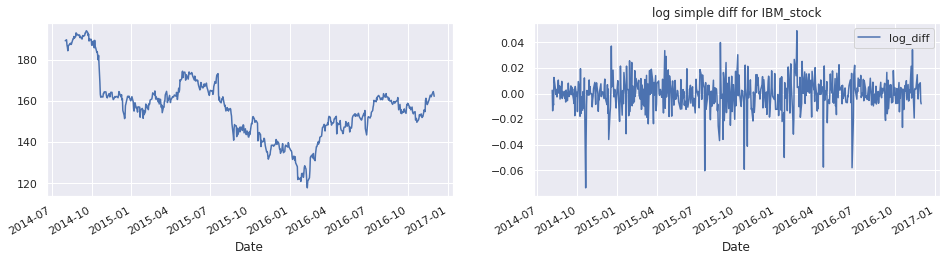

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
ibm['Close'].plot()
plt.subplot(3,2,2)
ibm['log_diff'].plot()
plt.title('log simple diff for IBM_stock')
plt.legend()
plt.show()

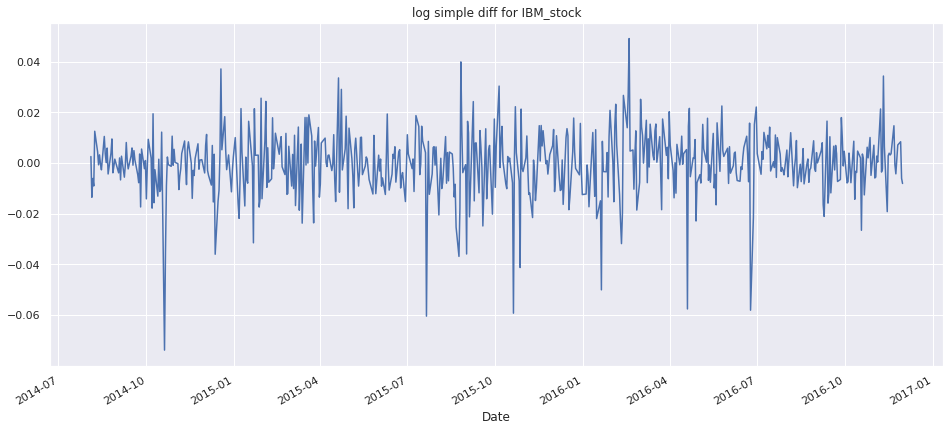

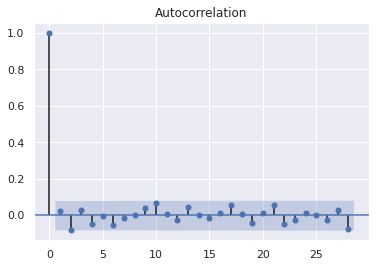

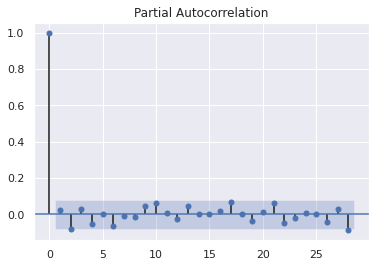

In [ ]:
ibm['log_diff'].plot(figsize=[16,7])
plt.title('log simple diff for IBM_stock')

plot_acf(ibm['log_diff'].dropna())
plt.show()


plot_pacf(ibm['log_diff'].dropna())
plt.show()

# **Exploratory Data Analysis**

**“Exploratory data analysis" is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.**

**four types of EDA**

**1)Univariate non-graphical method**

**2)Univariate graphical method**

**3)Multivariate non-graphical method**

**4)Multivariate graphical method**

In [ ]:
ibm.isnull().sum()

High          0
Low           0
Open          0
Close         0
Volume        0
Adj Close     0
diff          9
seas_diff     7
log_diff      1
new_diff     10
dtype: int64

There are no null values in the data frame

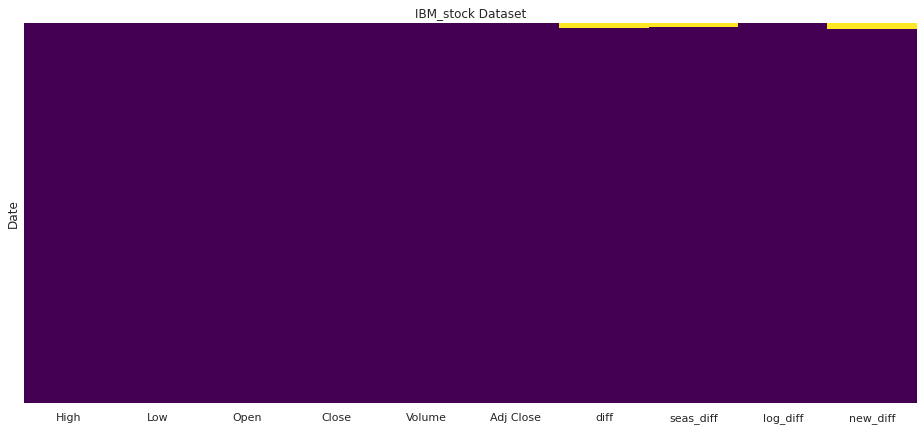

In [ ]:


import seaborn as sns


plt.figure(figsize=(16,7))
sns.set()
sns.heatmap(ibm.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('IBM_stock Dataset')
plt.show()


From above we can see there is no missing values in the dataset. Incase if there is any, we would have seen figure represented by different colour shade on purple background.

# **1) Univariate non-graphical method**

Breaking down the name, univariate implies that there is just one variable and non-graphical is well, there is no visual element in this method

In [ ]:
df = pd.DataFrame(new_IBM)

Taking IBM_Stock Closing prices for 5 days

In [ ]:
df[['Date', 'Close']].head()


,Date,Close
0,2014-08-01,189.149994
1,2014-08-04,189.639999
2,2014-08-05,187.100006
3,2014-08-06,185.970001
4,2014-08-07,184.300003


In [ ]:
ibm['Close'].describe()

count    589.000000
mean     156.617402
std       15.263828
min      117.849998
25%      147.889999
50%      156.949997
75%      162.880005
max      194.000000
Name: Close, dtype: float64

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles

It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

**Let's define a function to find out the IQR, lower and the upper whisker.**

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(ibm,'Close')
#Input the dataset and the required column

The IQR is 14.990005493164062
The lower bound value is 125.40499114990234
The upper bound value is 185.3650131225586
Total number of outliers are 65


**As per the IQR method, there are 65 outliers.**

In [ ]:
import statistics as st

print("Variance of the Closing price is % s" 
      %(st.variance(ibm['Close']))) 
print("Standard Deviation of Closing Price is % s " 
                % (st.stdev(ibm['Close'])))

Variance of the Closing price is 232.98443561732842
Standard Deviation of Closing Price is 15.2638276856537 


# **2) Univariate graphical method**

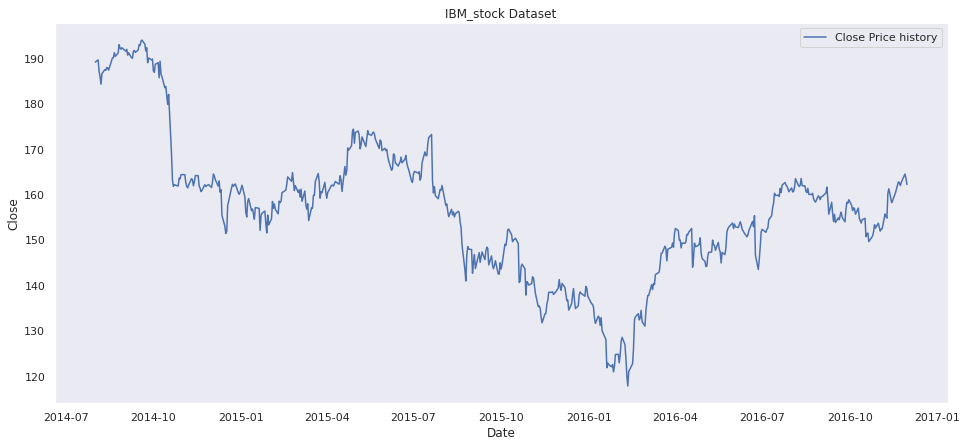

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
plt.plot(ibm["Close"], label='Close Price history')
plt.title('IBM_stock Dataset')
plt.ylabel('Close')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


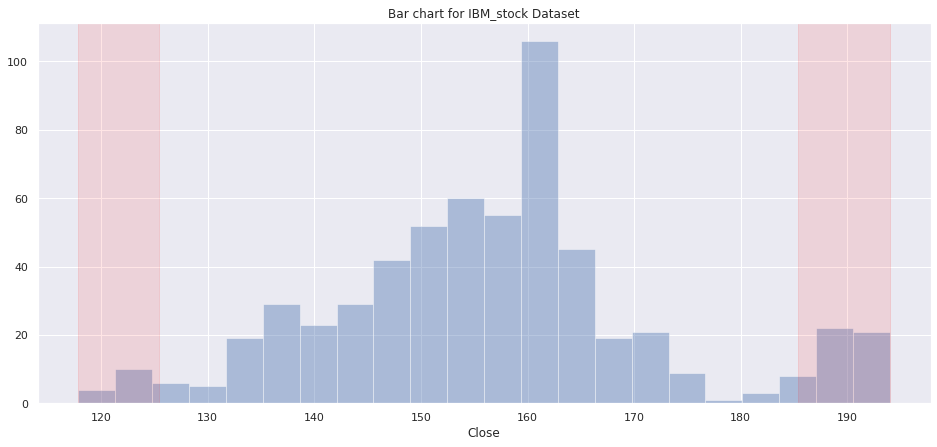

In [ ]:
plt.figure(figsize = (16,7))
plt.title('Bar chart for IBM_stock Dataset')
sns.distplot(ibm.Close, kde=False)
plt.axvspan(xmin = lower,xmax= ibm.Close.min(),alpha=.1, color='red')
plt.axvspan(xmin = upper,xmax= ibm.Close.max(),alpha=.1, color='red')
plt.show()

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

Remedial Measure:

Remove the records which are above the upper bound value and records below the lower bound value!

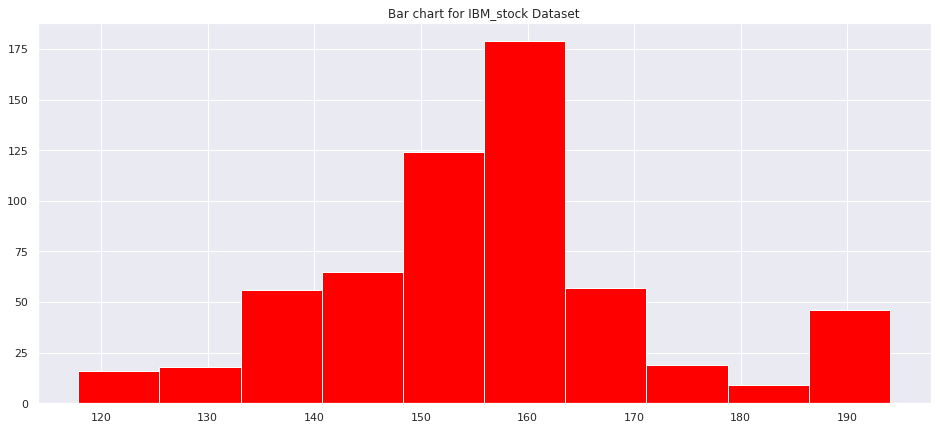

In [ ]:
ibm['Close'].dropna()
plt.figure(figsize=(16,7))
plt.hist(ibm['Close'],color ='red')
plt.title('Bar chart for IBM_stock Dataset')
plt.show()


In [ ]:
ibm['Close']=ibm['Close'].fillna(605.03)

Let's consider Close column for our analysis. We will plot a simple box plot which is the best visualization for detecting outliers

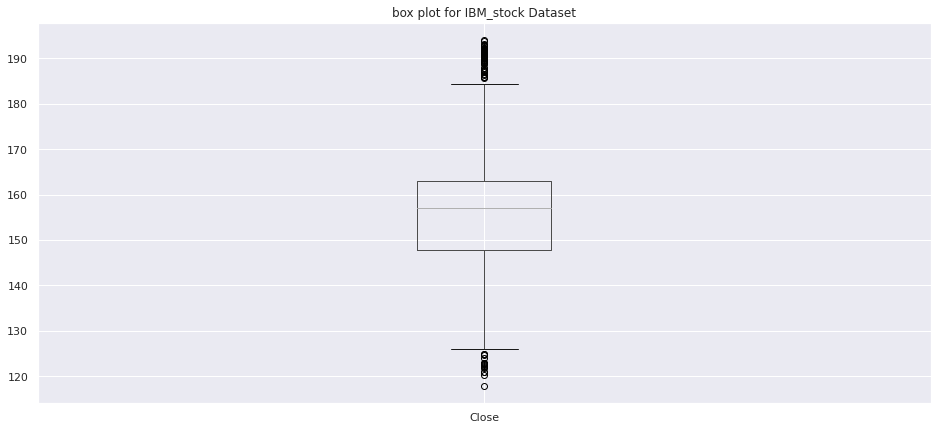

In [ ]:
plt.figure(figsize=(16,7))
ibm.boxplot(column = 'Close');
plt.title('box plot for IBM_stock Dataset')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'dis plot for IBM_stock Dataset')

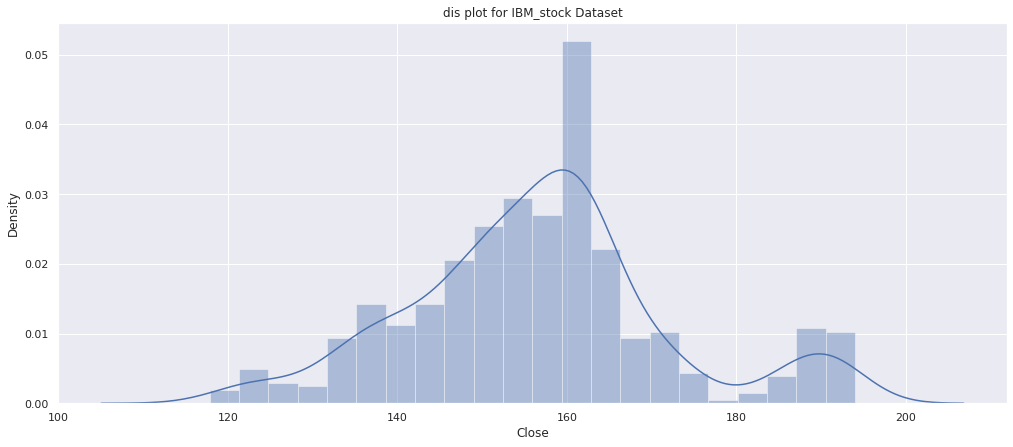

In [ ]:
plt.figure(figsize = (17,7))
sns.distplot(ibm['Close'])
plt.title('dis plot for IBM_stock Dataset')

By the looks of it, it has surely has outliers

# **3) Multivariate nongraphical method**

This helps us know how different the variables are in comparison to each other

In [ ]:
ibm.describe()

,High,Low,Open,Close,Volume,Adj Close,diff,seas_diff,log_diff,new_diff
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000,580.000000,582.000000,588.000000,579.000000
mean,157.737182,155.463786,156.583566,156.617402,4.244832e+06,123.461819,-0.387121,-0.291117,-0.000261,0.000043
std,15.227783,15.364561,15.325756,15.263828,2.246524e+06,10.790073,5.536764,4.977818,0.012955,0.018035
min,119.660004,116.900002,118.459999,117.849998,1.415800e+06,94.504570,-26.130005,-22.699997,-0.073791,-0.067985
25%,148.649994,146.449997,147.610001,147.889999,2.962400e+06,117.349693,-3.392502,-2.940002,-0.007008,-0.010004
50%,158.369995,155.679993,157.070007,156.949997,3.725400e+06,124.090508,-0.279999,-0.169998,0.000312,-0.000291
75%,164.000000,161.830002,162.770004,162.880005,4.701400e+06,129.907471,3.037506,2.767494,0.006881,0.009801
max,195.000000,193.190002,194.539993,194.000000,2.341650e+07,148.113205,16.650002,14.549995,0.049130,0.074095


In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    float64
 5   Adj Close  589 non-null    float64
 6   diff       580 non-null    float64
 7   seas_diff  582 non-null    float64
 8   log_diff   588 non-null    float64
 9   new_diff   579 non-null    float64
dtypes: float64(10)
memory usage: 50.6 KB


We can see all the  variables having non null values .It can sometimes become an obstacle for effective analysis.

# **4) Multivariate graphical method**

In multivariate graphical methods, we will analyse the entire dataset together. 



Scatter plots are used to visualize the relationship between two different data sets

The scatter plot is an interesting way to look at the entire dataset and observe any correlations.

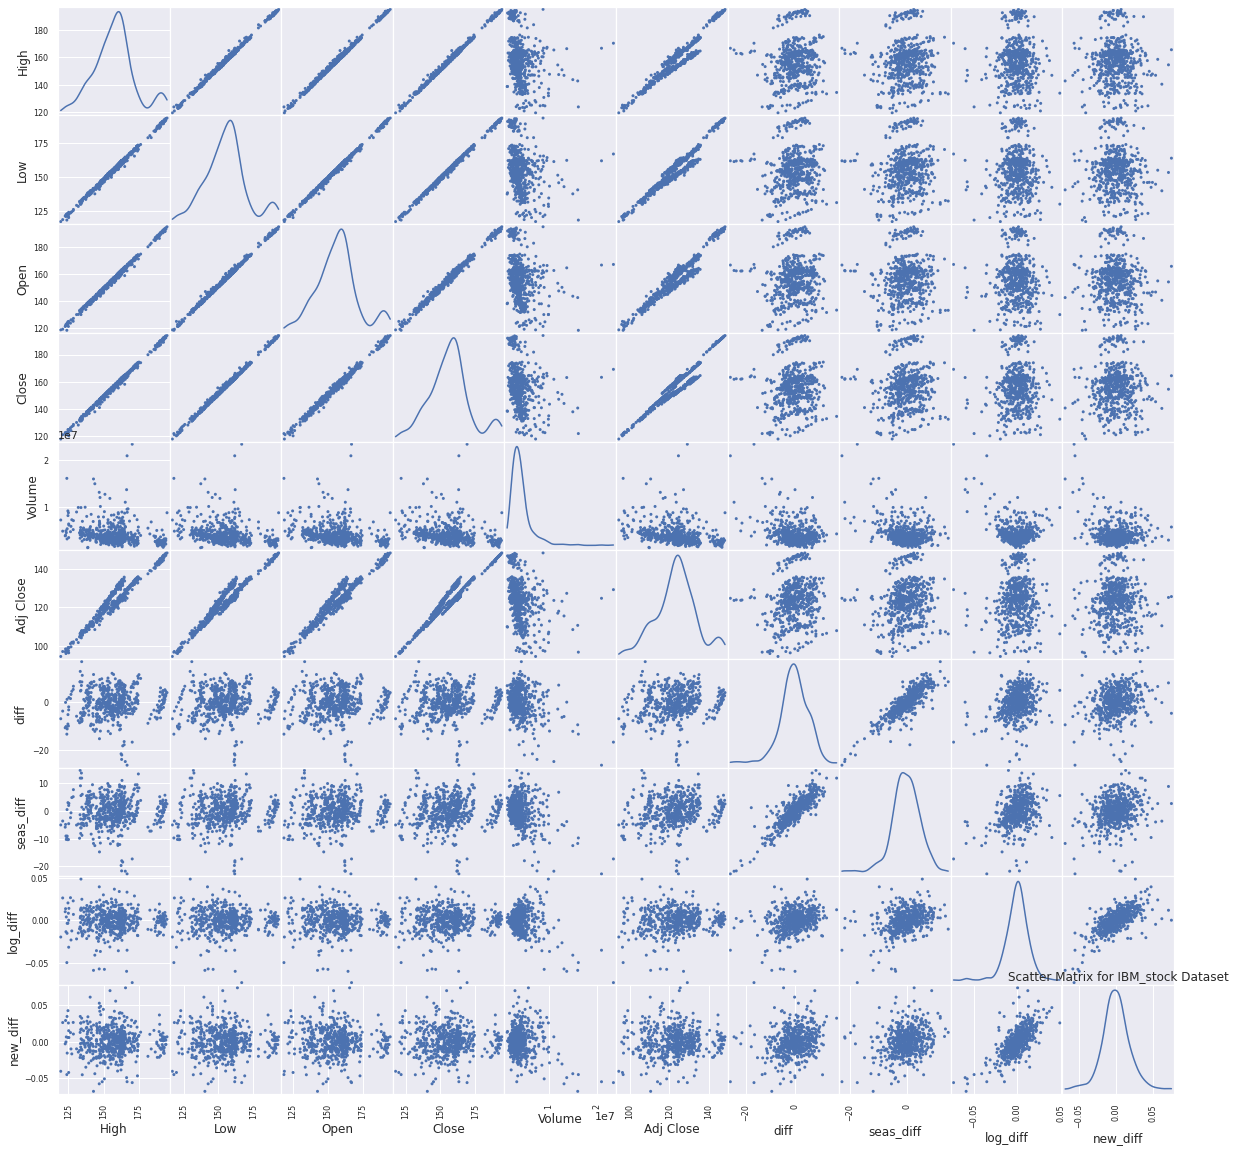

In [ ]:
pd.plotting.scatter_matrix(ibm, alpha=1.0, figsize=(20, 20), diagonal='kde')
plt.title('Scatter Matrix for IBM_stock Dataset')
plt.show()

 we also have heatmaps which are a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours

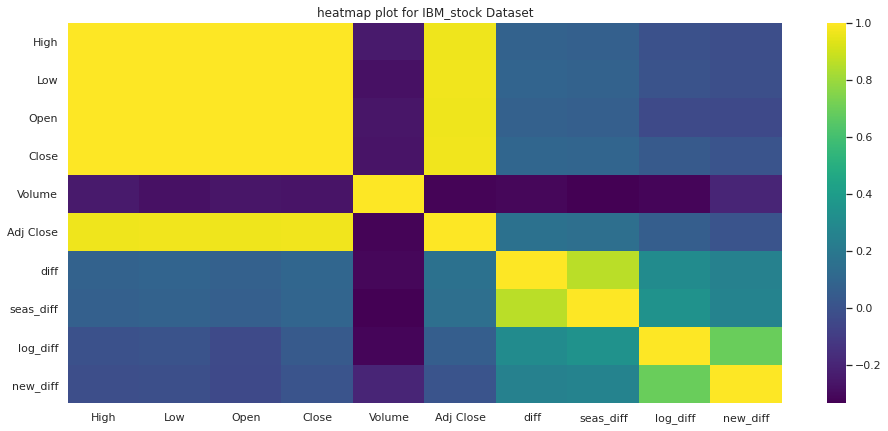

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,7))
sns.heatmap(ibm.corr(),cmap='viridis',annot=False) 
plt.title('heatmap plot for IBM_stock Dataset')
plt.show()

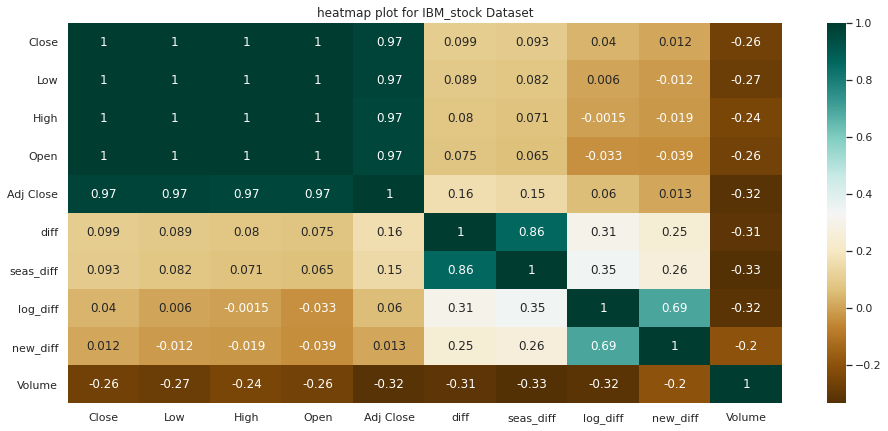

In [ ]:
k = 20
cols = ibm.corr().nlargest(k, 'Close')['Close'].index
cm = ibm[cols].corr()
plt.figure(figsize=(16,7))
sns.heatmap(cm, annot=True, cmap = 'BrBG')
plt.title('heatmap plot for IBM_stock Dataset')
plt.show()

**Conclusion**

 EDA will help us in arriving at the solution much faster as we would have already identified any patterns which we would like to exploit when we enter the data modelling phase